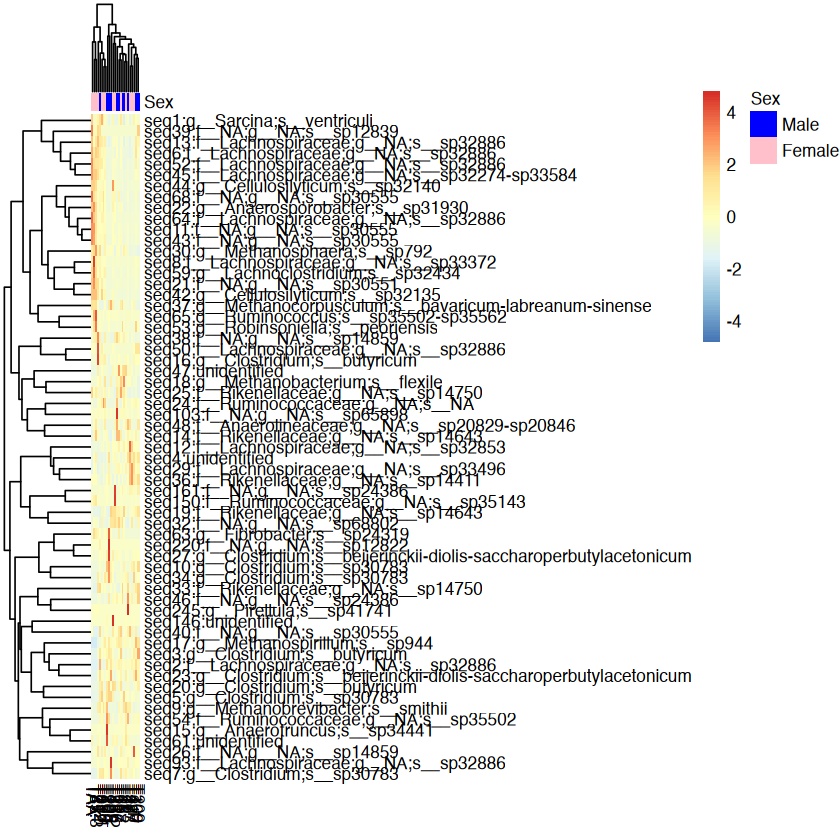

In [2]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 10%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99.9th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Generate the heatmap with the annotation bar
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE)


In [2]:
2 + 2

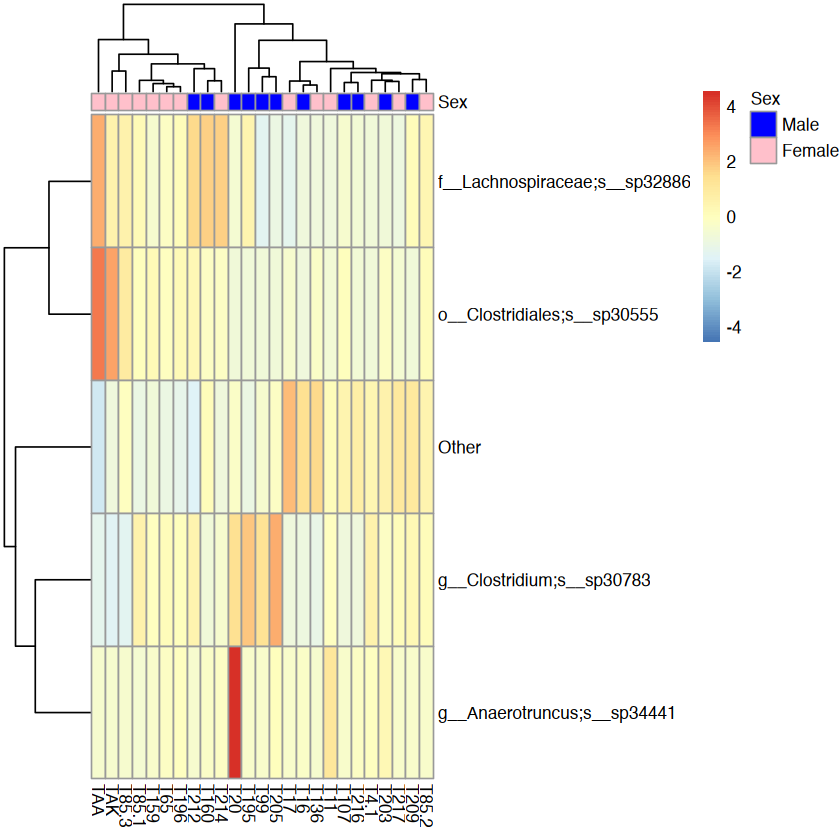

In [3]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/taxa_abun_table_L7.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 10%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.997)  # Find the 99.9th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Generate the heatmap with the annotation bar
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE)


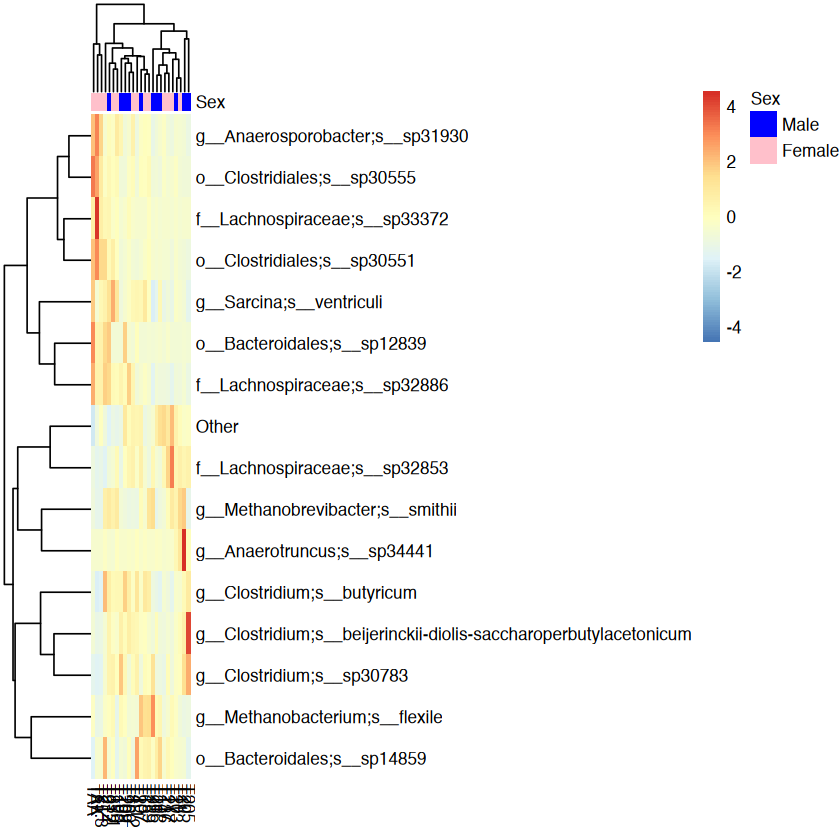

In [4]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/taxa_abun_table_L7.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 10%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99.9th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Generate the heatmap with the annotation bar
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE)


In [5]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/taxa_abun_table_L7.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 10%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette
my_palette <- colorRampPalette(c("blue", "white", "red"))(n = 100) # n defines the number of colors

# Set the width and height of the heatmap
heatmap_width <- 10
heatmap_height <- 8

# Save the plot as a PNG file with 300 DPI
png(filename = "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmap.png", width = heatmap_width * 300, height = heatmap_height * 400, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential Taxa Abundance at Species Resolution of Male & Female Samples\nTop 1% Variant Taxa Highlighted") # Use the custom palette and add title
dev.off()


quartz_off_screen 
                3

In [8]:
2 + 2

[1] 4

In [9]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 1%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette (default gradient)
my_palette <- colorRampPalette(c("blue", "white", "red"))(100)

# File path to save the heatmap
output_file <- "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png"

# Set the width and height of the heatmap
heatmap_width <- 10
heatmap_height <- 8

# Save the plot as a PNG file with 300 DPI
png(filename = output_file, width = heatmap_width * 300, height = heatmap_height * 400, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential ASV Abundance of Male & Female Samples\nTop 1% Variant ASVs Highlighted") # Use the custom palette and add title
dev.off()

# Check if the file was created
if (file.exists(output_file)) {
print(paste("Heatmap saved successfully at", output_file))
} else {
print(paste("Failed to save heatmap at", output_file))
}


quartz_off_screen 
                3

[1] "Failed to save heatmap at /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png"


In [11]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 1%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette
# my_palette <- colorRampPalette(c("blue", "white", "red"))(n = 100)
# my_palette <- colorRampPalette(c("navy", "white", "firebrick3"))(n = 100)
# my_palette <- colorRampPalette(c("purple", "white", "orange"))(n = 100)
# my_palette <- colorRampPalette(c("darkgreen", "white", "darkred"))(n = 100)
# my_palette <- colorRampPalette(c("blue", "yellow", "red"))(n = 100)
my_palette <- colorRampPalette(c("cyan", "black", "magenta"))(n = 100)

# File path to save the heatmap
output_file <- "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmap.png"

# Set the width and height of the heatmap
heatmap_width <- 10
heatmap_height <- 8

# Save the plot as a PNG file with 300 DPI
png(filename = output_file, width = heatmap_width * 300, height = heatmap_height * 300, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential Taxa Abundance at Species Resolution Between Male and Female Samples\nTop 1% Variant Taxa Highlighted") # Use the custom palette and add title
dev.off()

# Check if the file was created
if (file.exists(output_file)) {
print(paste("Heatmap saved successfully at", output_file))
} else {
print(paste("Failed to save heatmap at", output_file))
}


quartz_off_screen 
                3

[1] "Heatmap saved successfully at /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmap.png"


In [12]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 1%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette
# my_palette <- colorRampPalette(c("blue", "white", "red"))(n = 100)
# my_palette <- colorRampPalette(c("navy", "white", "firebrick3"))(n = 100)
# my_palette <- colorRampPalette(c("purple", "white", "orange"))(n = 100)
# my_palette <- colorRampPalette(c("darkgreen", "white", "darkred"))(n = 100)
# my_palette <- colorRampPalette(c("blue", "yellow", "red"))(n = 100)
my_palette <- colorRampPalette(c("cyan", "black", "magenta"))(n = 100)

# File path to save the heatmap
output_file <- "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmap.png"

# Set the width and height of the heatmap
heatmap_width <- 10
heatmap_height <- 8

# Save the plot as a PNG file with 300 DPI
png(filename = output_file, width = heatmap_width * 300, height = heatmap_height * 300, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential Taxa Abundance at Species Resolution Between Male and Female Samples\nTop 1% Variant Taxa Highlighted") # Use the custom palette and add title
dev.off()

# Check if the file was created
if (file.exists(output_file)) {
print(paste("Heatmap saved successfully at", output_file))
} else {
print(paste("Failed to save heatmap at", output_file))
}


quartz_off_screen 
                3

[1] "Heatmap saved successfully at /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmap.png"


In [13]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/taxa_abun_table_L7.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 10%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette
my_palette <- colorRampPalette(c("blue", "white", "red"))(n = 100) # n defines the number of colors

# Set the width and height of the heatmap
heatmap_width <- 10
heatmap_height <- 8

# Save the plot as a PNG file with 300 DPI
png(filename = "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapOTU.png", width = heatmap_width * 400, height = heatmap_height * 400, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential Taxa Abundance at Species Resolution of Male & Female Samples\nTop 1% Variant Taxa Highlighted") # Use the custom palette and add title
dev.off()


quartz_off_screen 
                3

In [14]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/taxa_abun_table_L7.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 10%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette
my_palette <- colorRampPalette(c("blue", "white", "red"))(n = 100) # n defines the number of colors

# Set the width and height of the heatmap
heatmap_width <- 14
heatmap_height <- 10

# Save the plot as a PNG file with 300 DPI
png(filename = "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapOTU.png", width = heatmap_width * 400, height = heatmap_height * 400, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential Taxa Abundance at Species Resolution of Male & Female Samples\nTop 1% Variant Taxa Highlighted") # Use the custom palette and add title
dev.off()


quartz_off_screen 
                3

In [15]:
from PIL import Image

# Open the PNG file
png_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapOTU.png'
tif_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapOTU.tif'

# Convert PNG to TIFF
with Image.open(png_path) as img:
    img.save(tif_path, format='TIFF', dpi=(300, 300))


ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: from PIL
         ^


In [16]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 1%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette (default gradient)
my_palette <- colorRampPalette(c("blue", "white", "red"))(100)

# File path to save the heatmap
output_file <- "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png"

# Set the width and height of the heatmap
heatmap_width <- 14
heatmap_height <- 8

# Save the plot as a PNG file with 300 DPI
png(filename = output_file, width = heatmap_width * 300, height = heatmap_height * 400, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential ASV Abundance of Male & Female Samples\nTop 1% Variant ASVs Highlighted") # Use the custom palette and add title
dev.off()

# Check if the file was created
if (file.exists(output_file)) {
print(paste("Heatmap saved successfully at", output_file))
} else {
print(paste("Failed to save heatmap at", output_file))
}


quartz_off_screen 
                3

[1] "Failed to save heatmap at /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png"


In [17]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 1%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette (default gradient)
my_palette <- colorRampPalette(c("blue", "white", "red"))(100)

# File path to save the heatmap
output_file <- "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png"

# Set the width and height of the heatmap
heatmap_width <- 10
heatmap_height <- 8

# Save the plot as a PNG file with 300 DPI
png(filename = output_file, width = heatmap_width * 300, height = heatmap_height * 300, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         main = "Differential ASV Abundance of Male & Female Samples\nTop 1% Variant ASVs Highlighted") # Use the custom palette and add title
dev.off()

# Check if the file was created
if (file.exists(output_file)) {
print(paste("Heatmap saved successfully at", output_file))
} else {
print(paste("Failed to save heatmap at", output_file))
}


quartz_off_screen 
                3

[1] "Failed to save heatmap at /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png"


In [3]:
from PIL import Image

# Open the PNG file
png_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png'
tif_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.tif'

# Convert PNG to TIFF
with Image.open(png_path) as img:
    img.save(tif_path, format='TIFF', dpi=(300, 300))

print(f"Converted {png_path} to {tif_path} successfully.")


Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.tif successfully.


In [5]:

from PIL import Image

# Open the PNG file
png_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/LEfSe_Input.png'
tif_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/LEfSe_Input.tif'

# Convert PNG to TIFF
with Image.open(png_path) as img:
    img.save(tif_path, format='TIFF', dpi=(300, 300))

print(f"Converted {png_path} to {tif_path} successfully.")


Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/LEfSe_Input.png to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/LEfSe_Input.tif successfully.


In [6]:
from PIL import Image

# Open the PNG file
png_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png'
tif_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.tif'

# Convert PNG to TIFF
with Image.open(png_path) as img:
    img = img.convert("RGB")  # Ensure the image is in RGB mode
    img.save(tif_path, format='TIFF', dpi=(300, 300))

print(f"Converted {png_path} to {tif_path} successfully.")


Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.tif successfully.


In [18]:
# Load the necessary library
library(pheatmap)

# Define the order of samples and their genders
male_samples <- c("T20", "T107", "T203", "T212", "T99", "T195", "T205", "T160", "T216", "T209", "T16")
female_samples <- c("T11", "T85.1", "T65", "T196", "T85.2", "TAK", "T85.3", "T159", "TAA", "T4.1", "T214", "T136", "T17", "T217")

# Create a vector of genders corresponding to the ordered sample list
sample_sexes <- c(rep("Male", length(male_samples)), rep("Female", length(female_samples)))

# Read the data
data <- read.table("/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/Raw_Data.txt", header = TRUE, row.names = 1, sep = "\t")

# Ensure the data is in the correct order and filter out any samples not in the metadata
data <- data[, c(male_samples, female_samples)]

# Calculate variance for each taxon and filter for the top 1%
variances <- apply(data, 1, var)  # Calculate variance for each row
threshold <- quantile(variances, 0.99)  # Find the 99th percentile
data_filtered <- data[variances > threshold, ]  # Filter rows

# Create a data frame for the annotation bar
annotation_col <- data.frame(Sex = factor(sample_sexes))
rownames(annotation_col) <- colnames(data_filtered)

# Define colors for the annotation
annotation_colors <- list(Sex = c(Male = "blue", Female = "pink"))

# Define a custom color palette (default gradient)
my_palette <- colorRampPalette(c("blue", "white", "red"))(100)

# File path to save the heatmap
output_file <- "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png"

# Set the width and height of the heatmap
# Adjust the width and height to avoid overlapping text
heatmap_width <- 18  # Increase width for better visibility of taxonomic names
heatmap_height <- 12

# Save the plot as a PNG file with 300 DPI
png(filename = output_file, width = heatmap_width * 300, height = heatmap_height * 300, res = 300)
pheatmap(data_filtered,
         scale = "row",
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         annotation_col = annotation_col,
         annotation_colors = annotation_colors,
         col_cluster = FALSE,
         color = my_palette,
         fontsize_row = 10,  # Adjust the font size of row labels
         fontsize_col = 12,  # Adjust the font size of column labels
         main = "Differential ASV Abundance of Male & Female Samples\nTop 1% Variant ASVs Highlighted") # Use the custom palette and add title
dev.off()

# Check if the file was created
if (file.exists(output_file)) {
print(paste("Heatmap saved successfully at", output_file))
} else {
print(paste("Failed to save heatmap at", output_file))
}


quartz_off_screen 
                3

[1] "Failed to save heatmap at /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png"


In [8]:
from PIL import Image

# Open the PNG file
png_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png'
tif_path = '/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.tif'

# Convert PNG to TIFF
with Image.open(png_path) as img:
    img = img.convert("RGB")  # Ensure the image is in RGB mode
    img.save(tif_path, format='TIFF', dpi=(300, 300))

print(f"Converted {png_path} to {tif_path} successfully.")


Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.png to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/ANCOM/heatmapASV.tif successfully.


In [1]:
from PIL import Image
import os

# List of file paths to convert
file_paths = [
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_6a.tif",
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_2b.tiff",
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_2a.tiff",
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_1.tiff",
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_3b.tif",
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_3a.tif",
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_5.tif",
    "/Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_6b.tif"
]

# Function to convert TIF/TIFF to JPG
def convert_to_jpg(file_path):
    with Image.open(file_path) as img:
        # Create the output file path by changing the extension to .jpg
        output_path = os.path.splitext(file_path)[0] + '.jpg'
        img = img.convert("RGB")  # Ensure image is in RGB mode
        # Save as JPG with high quality and set the DPI to 300
        img.save(output_path, "JPEG", quality=95, dpi=(300, 300))
        print(f"Converted {file_path} to {output_path}")

# Convert each file
for file_path in file_paths:
    convert_to_jpg(file_path)


Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_6a.tif to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_6a.jpg
Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_2b.tiff to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_2b.jpg
Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_2a.tiff to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_2a.jpg
Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_1.tiff to /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_1.jpg
Converted /Users/dimitriosgiakoumas/Library/CloudStorage/OneDrive-FloridaAtlanticUniversity/Figures/Figure_3b.tif t